In [1]:
from newsapi import NewsApiClient
import os
from dotenv import load_dotenv

load_dotenv()

newsapi = NewsApiClient(api_key= os.environ.get('NEWS_API'))

In [2]:
import datetime

In [3]:
# /v2/top-headlines/sources
sources = newsapi.get_sources()

### US
Al Jazeera English 
Associated Press 
Bloomberg 
Business Insider
CNN
Fortune
Google News
The Huffington Post
The Verge
The Wall Street Journal
The Washington Post
The Washington Times
Time
CBS
CNBC
NBC
Time
Reuters

### UK
BBC News
Google News UK
Business Insider (UK)


In [4]:
sourcesList = ['al-jazeera-english', 'associated-press', 'bloomberg', 'business-insider', 'cbs-news', 'cnn',
                'fortune', 'google-news', 'msnbc', 'nbc-news', 'reuter', 'the-huffington-post', 'the-verge', 
                'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time']

sourcesStitched = ', '.join(sourcesList)

sourcesStitched

'al-jazeera-english, associated-press, bloomberg, business-insider, cbs-news, cnn, fortune, google-news, msnbc, nbc-news, reuter, the-huffington-post, the-verge, the-wall-street-journal, the-washington-post, the-washington-times, time'

In [5]:
today = datetime.date.today()

yday = today - datetime.timedelta(days = 1)

yday.strftime('%Y-%m-%d')

'2022-07-06'

In [8]:
Jul1 = '2022-07-01'

In [19]:
articles = newsapi.get_everything(
    q = 'decarbonize', 
    sources = 'the-washington-post',
    from_param = Jul1,
    to = Jul1,
    language = 'en',
    sort_by = 'relevancy' 
    )

In [20]:
articles

{'status': 'ok',
 'totalResults': 1,
 'articles': [{'source': {'id': 'the-washington-post',
    'name': 'The Washington Post'},
   'author': 'Steven Mufson',
   'title': 'The U.S. is ditching coal. The Supreme Court ruling won’t change that.',
   'description': 'Outside the courtroom, reviving the fossil fuel business isn’t going to be simple.',
   'url': 'https://www.washingtonpost.com/climate-environment/2022/07/01/supreme-court-epa-coal-climate-change/',
   'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/GLH3YTP4BRDKBCI767FYJDNVUM.jpg&w=1440',
   'publishedAt': '2022-07-01T11:00:24Z',
   'content': 'Placeholder while article actions load\r\nWhen conservative environmental lawyer Jeffrey Holmstead joined the Bracewell firm in late 2006, it represented the whole range of electric power companies, in… [+8506 chars]'}]}

In [9]:
start = today - datetime.timedelta(days = 30)
dates = []
count = []

for day in (yday - datetime.timedelta(days = n) for n in range(30)):
    articles = newsapi.get_everything(
    q = '+decarbonization', 
    sources = sourcesStitched,
    from_param = day,
    to = day,
    language = 'en',
    sort_by = 'popularity' 
    )

    dates.append(day)
    count.append(articles['totalResults'])

In [10]:
dates[count.index(max(count))]

datetime.date(2022, 6, 28)

In [16]:
import matplotlib.pyplot as plt

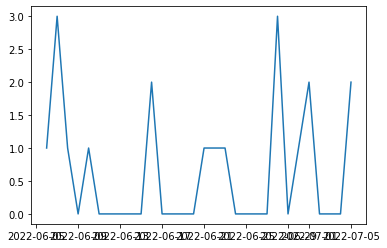

In [19]:
plt.plot(dates, count)